# Partie 1 : méthodes de gradient

Le but de cette première partie du TP est de programmer, valider et expérimenter l’algorithme du **gradient à pas fixe (GF)** et à **gradient à pas optimal (GO)**. Pour faciliter les comparaisons, les 2 variantes seront implémentées dans le même programme. Pour les expérimentations et validations, on considèrera les fonctions suivantes:

$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}, \quad J_{R}(v)=\sum_{i=1}^{i=N-1}\left\{\left(v_{i+1}-v_{i}^{2}\right)^{2}+\left(v_{i}-1\right)^{2}\right\}
$$

> Préciser les gradients, et les solutions optimales exactes pour ces 3 fonctions coût.

- **J1**<br>
Gradient: $\nabla J_1(v)$ = 2($v_i$ - 1)
Solution: $ V^* = \begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} $

- **J2**<br>
Gradient: $\nabla J_2(v)$ = 2($v_i$ - i)
Solution: $ V^* = \begin{bmatrix} 1 \\ 2 \\ \vdots \\ N-1 \\ N \end{bmatrix} $

- **JR**<br>
Gradient: $\nabla J_R(v) = \begin{bmatrix} \frac{\partial J_i}{\partial v_i} = 2(v_i - 1) - 4v_i(v_{i+1} - v_i^2) \\  \frac{\partial J_i}{\partial v_{i+1}} = 2(v_{i+1} - v_i^2) \end{bmatrix} $
Solution: $ V^* = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \\ 1 \end{bmatrix} $


$$
\nabla J_1 (v),\quad\quad \nabla J_2 (v),\quad\quad \nabla J_R (v) ~~ ?
$$

In [1]:
import numpy as np

In [4]:
# retourne la valeur de la fonction et de sont gradient

def J1 (v): 
    N = len(v)
    ones = np.ones(N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    i = np.arange(1, N+1)
    return [np.dot(v-i, v-i), 2*(v-i)]

## JR Rosenbrock
def JR (v):
    v = np.array(v)
    N = len(v)
    ones = np.ones(N-1)

    # JR Values
    vect1 = v[1:] - (v[:-1]*v[:-1])
    vect2 = v[:-1] - ones
    values = np.dot(vect1, vect1) + np.dot(vect2, vect2)

    # JR Gradient
    vect1 = 2*(v[:-1] - ones) - 4*v[:-1]*(v[1:] - v[:-1]**2)
    vect2 = 2*(v[1:] - v[:-1]**2)
    gradient = np.append(vect1, 0) + np.insert(vect2, 0, 0)

    return [values, gradient]

Evaluations des fonctions et de leurs gradients :

In [5]:
## prendre des exemples test

v = np.array([1,2,1]) 
J1(v)

[J0,G0] = J1(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J0))
print (r'Le gradient de J_1 en v={} est égale à {}'.format(v,G0))

La valeur de J_1 en v=[1 2 1] est égale à 1.0
Le gradient de J_1 en v=[1 2 1] est égale à [0. 2. 0.]


In [6]:
J2([1, 2, 3])

[0, array([0, 0, 0])]

In [7]:
JR([1, 2, 3])

[3.0, array([-4., 12., -2.])]

Traçage des fonctions par rapport à la dernière variable :

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

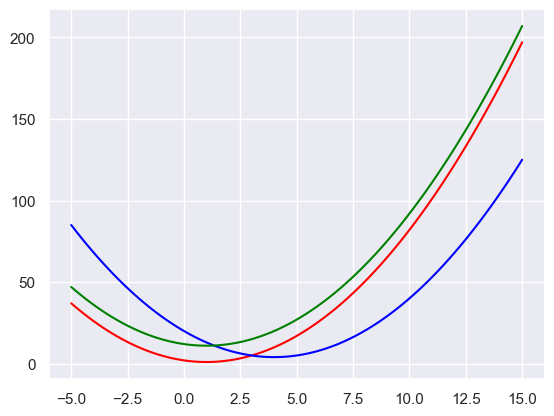

In [9]:
## Ici on trace J(1,2,1,x) avec x entre -5 et 15 juste pour voir ces variations par rapport à une variable (la dernière)

x = np.linspace(-5,15,100)
v =np.array([1,2,1])

y1 = [J1(np.append(v,xi))[0] for xi in x]
y2 = [J2(np.append (v,xi))[0] for xi in x]
yR = [JR(np.append (v,xi))[0] for xi in x]

plt.plot(x,y1,color="red")
plt.plot(x,y2,color="blue")
plt.plot(x,yR,color="green")

## Etape 1.
> Rappeler les trois versions GF, GV et GO, et identifier l’ensemble des données utilisateur, numériques, et de contrôle.

- **GF: Gradient Fixe**<br>
L'algorithme du Gradient Fixe constitue une méthode d'optimisation employée pour réduire une fonction de coût en ajustant itérativement les paramètres du modèle. Son fonctionnement débute par l'initialisation d'une valeur u. Par la suite, le gradient est calculé en ce point spécifique. Pour itérer et minimiser u, la valeur de u est mise à jour en la remplaçant par elle-même soustraite de la multiplication du gradient en ce point par un pas fixe, choisi à l'avance. C'est cette caractéristique de multiplication par un pas fixe qui confère à l'algorithme son appellation "fixe". Cette méthode permet ainsi de converger graduellement vers le minimum recherché.<br><br>
    - Données utilisateurs: La fonction cout **J**, le pas fixe **t**, 
    - Données numériques: tolerance sur la norment du gradient **eps**, le nombre maximal d'iterations **Kmax**, La valeur initial de **u**
    - Les condtions d'arrets **$\nabla J(u)$ < eps or iterration == Kmax:**<br><br>
    - Algorithme: 
    - $u = u_0$
    - $k = 0$
    - $p = $"asigner une valeur de pas fixe arbitraire"
    - Faire 
        - grad = $\nabla J(u)$
        - u = u - (p * grad)
        - k++
    - Tant que $||grad||>\epsilon$ ou $k \neq kmax$
    - Return (k, u)

<br>

- **GO: Gradient Optimal**<br>
L'algorithme du Gradient Optimal constitue une méthode d'optimisation employée pour réduire une fonction de coût en ajustant itérativement les paramètres du modèle. Son fonctionnement débute par l'initialisation d'une valeur u. Par la suite, le gradient est calculé en ce point spécifique. Pour itérer et minimiser u, la valeur de u est mise à jour en la remplaçant par elle-même soustraite de la multiplication du gradient en ce point par un pas optimal, qui est calculé en ce point et qui est fontion du pas precedent. L'idée du pas optimal est de trouver la valeur de $p$ qui minimise $J(u_k -p\nabla J(u_k ))$. C'est cette caractéristique de calcul dynamique du pas avant chaque mis a jour de **u** qui confère à l'algorithme son appellation "optimal". Cette méthode permet ainsi de converger plus efficacement vers le minimum recherché sans se soucier pu pas choisit.<br><br>
    - Données utilisateurs: La fonction cout **J**, un pas abitraire qui sera dynamiquement changé **t**, 
    - Données numériques: tolerance sur la norment du gradient **eps**, le nombre maximal d'iterations **Kmax**, La valeur initial de **u**
    - Les condtions d'arrets **$\nabla J(u)$ < eps or iterration == Kmax:**<br><br>
    - Algorithme: 
    - $u = u_0$
    - $k = 0$
    - $p = $"valeur aleatoire > 0"
    - Faire 
        - grad = $\nabla J(u)$
        - $p = PasOptimal(u, p)$
        - u = u - (p * grad)
        - k++
    - Tant que $||grad||>\epsilon$ ou $k \neq kmax$
    - Retourne (k, u)<br><br>
    - PasOptimal(u, p): 
    - L'idee du calcul du pas optimal est $J(u_k -p\nabla J(u_k )) \approx J(u_k) - p_{k}\nabla J(u)^T\nabla J(u) + \lambda{_k}p_{k}^2 = $ anssi pot $p_{k-1}$ on tire $\lambda$. Enfin On derive J par rapport a t et l'on trouve le t qui annule le gradient qui est donc le pas optimal.<br><br>
    - Algorithme: 
    - $grad = \nabla J(u)$
    - Retourne $\frac{grad^T.grad}{2\left(J(u - p.grad) - J(u) + \frac{p grad^T.grad}{p^2}\right)}$
    
<br>

- **GO: Gradient Variable, congugé**<br>
La methode GO pose des problemes comme l'Oscillations le long de la direction du gradient ce qui rend la convergence lente des fois. Le gradient conjugué est une méthode d'optimisation utilisée pour minimiser les fonctions de coût. Son principe repose sur une approche itérative qui tient compte des directions conjugées pour accélérer la convergence par rapport à la méthode du gradient optimal. 

## Etape 2.
- Ecrire le programme GF (utiliser les modules déjà définis de calcul de la fonction coût et de son gradient pour les fonctions $J_1$, $J_2$, $J_R$).
- Effectuer les tests de validation de GF pour les fonctions $J_1$ et $J_2$ ($N = 10,20,40$) : On prendra un pas fixe $t = 1$, qu’observe t-on et pourquoi ? puis prendre $t=0.1$ et ensuite $t = 0.5$.

**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $t>0$
- Itérations: répéter pour $k=0,1,\dots$   
  - calculer le gradient $\nabla f (u_{k})$;
  - calculer $u_{k+1} = u_{k} - t \nabla f (u_{k})$;
- Critère d'arrêt:  $\|\nabla f (u_{k}) \|_2 \leq \epsilon$ $\big($on utilise ici la norme euclidienne $\|\cdot \|_2$ $\big)$


In [11]:
# Modifier ici le choix de fonction, J1, J2, JR
def cost(v):
  return J1(v)

In [12]:
def gradient_fixe(J, t=1):
    """
    Algorithme de descente de gradent utilisant le pas fixe 
    params: t [1, 0.1, 0.5]
    Output: k(iteration), u(optimal_solution)
    """
    N=10            # nombre de variables d'optimisation (ou dimension du probleme)
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # First guess : u0
    u0 = np.zeros(N)
    k = 0
    u = u0

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        u = u - (t*grad)
        k += 1
        
    # Arret
    print(f"PAS={t}\t - Nombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_fixe(J1, 1)
gradient_fixe(J1, 0.1)
gradient_fixe(J1, 0.5)

PAS=1	 - Nombre d'itération: 1500	 - Vecteur u*: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
PAS=0.1	 - Nombre d'itération: 81	 - Vecteur u*: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]
PAS=0.5	 - Nombre d'itération: 1	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Etape 3.
> Dans cette étape on va construire l’approximation parabolique de la fonction $f(t) = J(u_k − t\nabla J(u_k))$, qui utilise $f(0)$, $f′(0)$ et $f(t_{k−1})$. S’en servir pour implémenter une approximation du calcul du pas optimal $t_k$. Valider GO sur les cas $J_1$ et $J_2$. Comparer ensuite GF et GO sur $J_R$ (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations).

Etant donné $u_k$, la valeur $J(u_k)$ et le gradient $\nabla J(u_k)$, on propose d'approcher $J$ par un modèle quadratique au voisinage de $u_k$ le long du gradient $G_k:= \nabla J (u_k)$, soit

$$
f(t):= J(u_k- t G_k ) \simeq J(u_k) - t G_k^\top G_k + \gamma_k t^2 =: \tilde{f}(t),
$$
avec $\gamma_k$  un scalaire qu'il faut identifier . On a en particulier,

$$
f(0)=J(u_k),
\quad\quad f'(0)= - G_k^\top G_k.
$$

- En prenant $\tilde{f}(t_{k-1}) = f(t_{k-1})$, **identifier** l'expression de $\gamma_k$ en fonction de $t_{k-1}, f(t_{k-1}), J(u_k)$ et $\nabla J (u_k)$.  
- **En déduire** l'approximation $t_{k}:=\mathop{\mathrm{argmin}}\limits_{t>0}\tilde{f}(t)$ du pas optimal en fonction de $\gamma_k$ et $\nabla J(u_k)$.
- **Implémenter** l'expression du pas optimal approché pour $J_1$, $J_2$ et $J_R$ dans la fonction suivante (où $u$ joue le rôle de $u_{k}$ et $t$ joue le rôle de $t_{k-1}$):


In [13]:
# abstract OptimalStep
def OptimalStep(J, u, t):
  grad = J(u)[1]
  lambda_k = (J(u - t*grad)[0] - J(u)[0] + (t*np.dot(grad.T, grad))) / t**2
  tk = np.dot(grad.T, grad) / (2 * lambda_k)
  return tk

def PasOptJ1(u,t):
  return OptimalStep(J1, u, t)

def PasOptJ2(u,t):
  return OptimalStep(J2, u, t)

def PasOptJR(u,t):
  return OptimalStep(JR, u, t)


**Pseudocode du GO (approché)**

>  
- Initialisation: prende un vecteur $u_0 \in {\mathbb R}^n$ arbitraire et un scalaire arbitraire $t_{-1}>0$
- Itérations: Répéter pour $k=0, 1,\dots$
  - Calculer le pas optimal approché $t_k$;
  - Calculer $u_{k+1} = u_{k} - t_{k} \nabla J (u_{k})$;
- Critère d'arrêt:  $\|\nabla J (u_{k}) \|_2 \leq \epsilon$


Valider cet algorithme GO sur les cas $J_1$ et $J_2$.

In [14]:
def gradient_optimal(PasOptimal, J):
    """
    Algorithme de descente de gradent utilisant la **méthode du pas optimal** 
    Output: k(iteration), u(optimal_solution)
    """
    N=10            # nombre de variables d'optimisation (ou dimension du probleme)
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # Premier pas arbitraire, t>0
    t = np.random.uniform(0.1, 4)

    # First guess : u0
    u0 = np.zeros(N)
    k = 0
    u = u0

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        t = PasOptimal(u, t)
        u = u - (t*grad)
        k += 1
        

    # Arret
    print(f"[{PasOptimal.__name__}]\tNombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_optimal(PasOptJ1, J1)
gradient_optimal(PasOptJ2, J2)
gradient_optimal(PasOptJR, JR)

[PasOptJ1]	Nombre d'itération: 1	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[PasOptJ2]	Nombre d'itération: 1	 - Vecteur u*: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[PasOptJR]	Nombre d'itération: 325	 - Vecteur u*: [1.         1.         1.         1.         1.         1.
 0.99999999 0.99999997 0.99999993 0.99999982]


Comparer ensuite GF et GO sur  $J_R$  (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations)

In [15]:
# FIXE JR
gradient_fixe(JR, 0.1)
gradient_fixe(JR, 0.101)
gradient_fixe(JR, 0.09)

PAS=0.1	 - Nombre d'itération: 370	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999977]
PAS=0.101	 - Nombre d'itération: 366	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999977]
PAS=0.09	 - Nombre d'itération: 412	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999977]


In [16]:
# OPTIMAL JR
gradient_optimal(PasOptJR, JR)

[PasOptJR]	Nombre d'itération: 345	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999997 0.99999993 0.99999982]


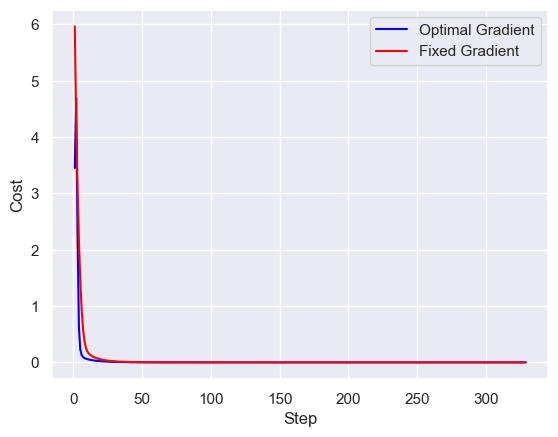

In [24]:
def courbe_de_convergence():
    J = JR
    PasOptimal = PasOptJR

    N=10
    eps = 1.e-7
    Kmax = 329

    # records of step and cost
    step = []
    cost_fix = []
    cost_opt = []

    # OPTIMAL
    t = 1
    u0 = np.zeros(N)
    k = 0
    u = u0
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        t = PasOptimal(u, t)
        u = u - (t*grad)
        k += 1
        step.append(k)
        cost_opt.append(J(u)[0])

    # FIXE
    t = 0.1
    u0 = np.zeros(N)
    k = 0
    u = u0
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        u = u - (t*grad)
        k += 1
        cost_fix.append(J(u)[0])
        

    # Plot
    plt.plot(step, cost_opt, color='blue', label='Optimal Gradient')
    plt.plot(step, cost_fix, color='red', label='Fixed Gradient')
    plt.xlabel('Step')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

courbe_de_convergence()

## Etape 5.
> Etudier les méthodes GF et GO sur le cas de la fonction $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$ . On prendra comme guess initial $u_0 = (0, 0)$ puis $u_0 = (1.5, −1.5)$. Que constatez-vous ? Comment valider ce constat ?

Gradient: $\nabla J_H(v) = \begin{bmatrix} \frac{\partial J_h}{\partial x} = 4x^3 - 4y^2 + 4xy - 4 \\  \frac{\partial J_h}{\partial y} = 4y^3 + 2x^2 + 6y - 8xy - 4 \end{bmatrix} $
Solution: $ v^* = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

In [25]:
def JH(v):
    v = np.array(v)
    n = 2

    # Cost
    value = (v[0]**2 + v[1] - 2)**2 + (v[1]**2 - 2*v[0] + 1)**2

    # Gradient
    x = v[0]
    y = v[1]
    gradient = np.array([4*(x**3-y**2+(x*y)-1), (4*(y**3) + 2*(x**2) + (6*y) - (8*x*y) - 4)])

    return [value, gradient]

In [26]:
# Fixe sur Fh

def gradient_fixe(J,  u0, t=1,):
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # First guess : u0

    k = 0
    u = np.array(u0)

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        u = u - (t*grad)
        k += 1
        

    # Arret
    print(f"PAS={t}\t - Nombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_fixe(JH, [0, 0], 0.085)
gradient_fixe(JH, [1.5, -1.5], 0.06)

PAS=0.085	 - Nombre d'itération: 25	 - Vecteur u*: [1. 1.]
PAS=0.06	 - Nombre d'itération: 35	 - Vecteur u*: [0.99999999 0.99999999]


In [27]:
def PasOptJH(u,t):
  return OptimalStep(JH, u, t)

def gradient_optimal(PasOptimal, J, u0):
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # Premier pas arbitraire, t>0
    t = np.random.uniform(0.1, 4)

    # First guess : u0
    u = np.array(u0)
    k = 0

    # Itération de GF
    while True:
        grad = J(u)[1]
        if np.linalg.norm(grad) < eps or k == Kmax:
            break
        t = PasOptimal(u, t)
        u = u - (t*grad)
        k += 1

    # Arret
    print(f"[{PasOptimal.__name__}]\tNombre d'itération: {k}\t - Vecteur u*: {u}")

gradient_optimal(PasOptJH, JH, [0, 0])

[PasOptJH]	Nombre d'itération: 13	 - Vecteur u*: [1. 1.]
